# MedCAT tutorial - Dataset Analysis and Preparation

Welcome to the MedCAT tutorials!

First before be begin extracting information from with patient records.
As with the begining of every datascience project. Let's explore the data that we are dealing with.



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

### Datasets

If you are using MIMIC-III you will have the create the create the `patients.csv` and `noteevents.csv` and place them into the folder specified below. How to prepare the CSV files is explained in the blog post [MedCAT | Dataset Analysis and Preparation](https://towardsdatascience.com/medcat-dataset-analysis-and-preparation-be8bc910bd6d).

In [6]:
DATA_DIR = "./data/"

### Download the data (only if using the pre-made datasets and not MIMIC-III. )

In [7]:
# Load files if in google colab, otherwise skip this step
! wget https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/noteevents.csv -P ./data/
! wget https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/patients.csv -P ./data/

--2022-02-15 17:04:38--  https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/noteevents.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7171226 (6.8M) [text/plain]
Saving to: ‘./data/noteevents.csv’

noteevents.csv      100%[===================>]   6.84M  --.-KB/s    in 0.06s   

2022-02-15 17:04:39 (122 MB/s) - ‘./data/noteevents.csv’ saved [7171226/7171226]

--2022-02-15 17:04:39--  https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/patients.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP r

### Set plot sizes and style

In [8]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(4,5)}, 
    style="white"
)

## Statistics on patients

In [9]:
patients = pd.read_csv(DATA_DIR + "patients.csv")
patients.head()

,subject_id,gender,dob
0,0,M,1/1/2018
1,1,F,1/1/2018
2,2,F,1/1/2018
3,3,M,1/1/2018
4,4,M,1/1/2018


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


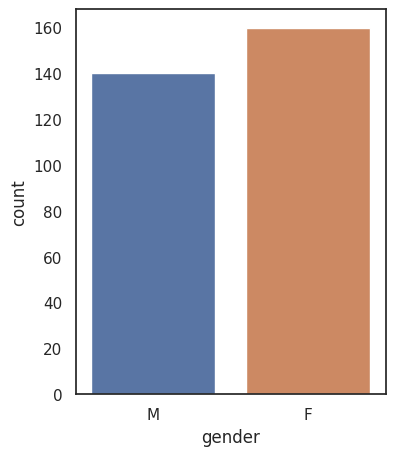

In [10]:
sns.countplot(patients['gender'])
plt.show()

In [11]:
print(f"Total number of patients: {len(patients)}")
print(f"Male: {len(patients[patients['gender'] == 'M'])}")
print(f"Female: {len(patients[patients['gender'] == 'F'])}")

Total number of patients: 300
Male: 140
Female: 160


## Statistics on note events

Note: This dataset is large and requires a bit more RAM to fully load into memory.

In [12]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(10,6)}, 
    style="white"
)

In [13]:
noteevents = pd.read_csv(DATA_DIR + "noteevents.csv")
noteevents.head()

,Unnamed: 0,subject_id,chartdate,category,text
0,0,0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,1,0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,2,0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,4,0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."


In [14]:
noteevents.category

0                              Urology
1               Emergency Room Reports
2                     General Medicine
3                     General Medicine
4           Consult - History and Phy.
                     ...              
2125        Cardiovascular / Pulmonary
2126           Obstetrics / Gynecology
2127     SOAP / Chart / Progress Notes
2128           Obstetrics / Gynecology
2129                 Speech - Language
Name: category, Length: 2130, dtype: object

In [15]:
# The column 'noteevents' contains the free text / unstructured text body of the document
print(noteevents.text.iloc[0])

CHIEF COMPLAINT: , Blood in urine.,HISTORY OF PRESENT ILLNESS:  ,This is a 78-year-old male who has prostate cancer with metastatic disease to his bladder and in several locations throughout the skeletal system including the spine and shoulder.  The patient has had problems with hematuria in the past, but the patient noted that this episode began yesterday, and today he has been passing principally blood with very little urine.  The patient states that there is no change in his chronic lower back pain and denies any incontinence of urine or stool.  The patient has not had any fever.  There is no abdominal pain and the patient is still able to pass urine.  The patient has not had any melena or hematochezia.  There is no nausea or vomiting.  The patient has already completed chemotherapy and is beyond treatment for his cancer at this time.  The patient is receiving radiation therapy, but it is targeted to the bones and intended to give symptomatic relief of his skeletal pain and not inte

In [16]:
noteevents_original = noteevents.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


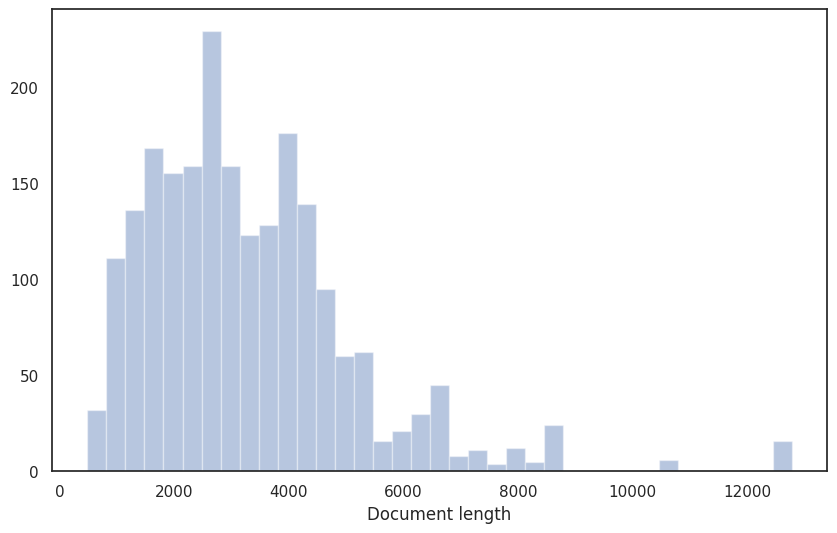

In [17]:
lns = noteevents.text.str.len().tolist()
sns.distplot(lns, kde=False, axlabel='Document length')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


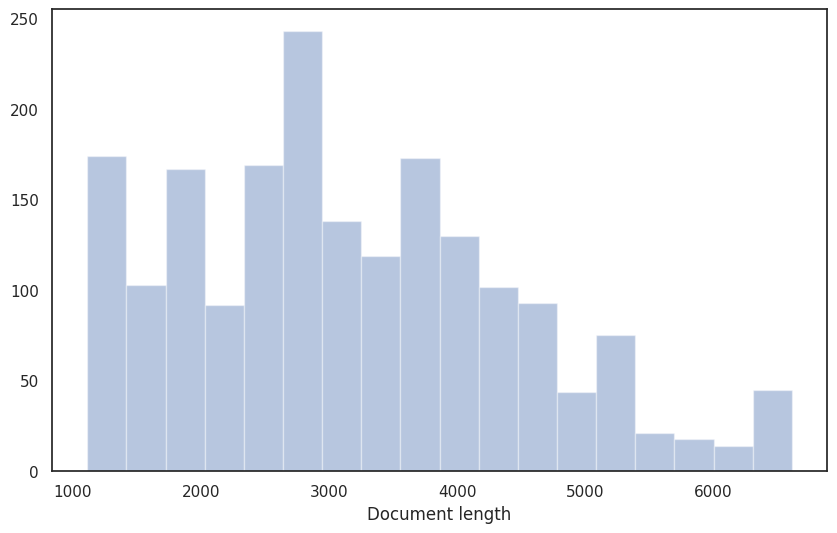

In [18]:
# Sort lengths
lns = sorted(lns)

# Take 5% as the removal size
rm_size = int(len(lns) / 100) * 5

# Now plot with removal of most/least frequent
sns.distplot(lns[rm_size:-rm_size], kde=False, axlabel='Document length')
plt.show()

### Cleaning based on document length

In [19]:
# Remove rows from the dataframe based on document length of top / bottom 5%.
min_ln = max(lns[0:rm_size])
max_ln = min(lns[-rm_size:])
noteevents = noteevents[(noteevents.text.str.len() > min_ln) & (noteevents.text.str.len() < max_ln)]
noteevents.head()

,Unnamed: 0,subject_id,chartdate,category,text
3,3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
6,6,1,01/01/2079,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
7,7,1,01/01/2079,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
8,8,1,01/01/2079,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
9,9,2,01/01/2037,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai..."


In [20]:
print(f"Length after cleaning : {len(noteevents)}")
print(f"Length of the original: {len(noteevents_original)}")

Length after cleaning : 1914
Length of the original: 2130


## Number of documents per patient

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


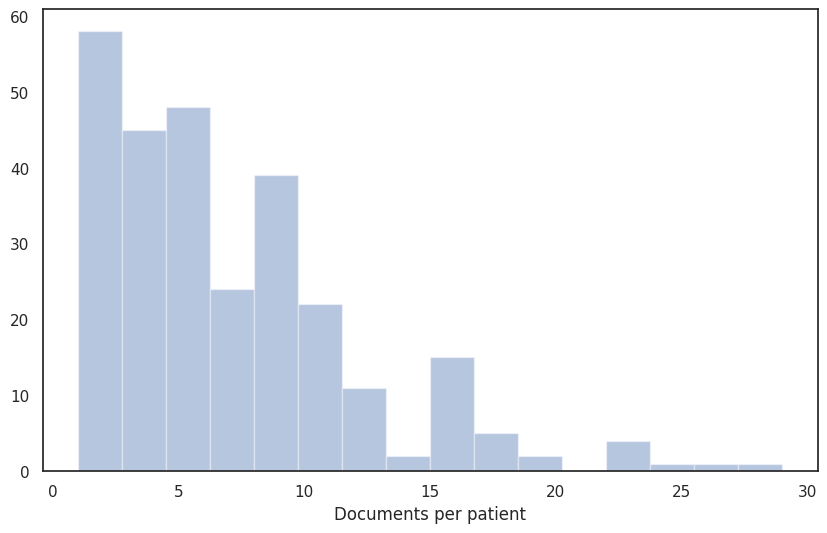

In [21]:
sns.distplot(noteevents['subject_id'].value_counts().values, kde=False, axlabel='Documents per patient')
plt.show()

In [22]:
# Again a bit of clean-up, let's remove the bottom/top 1% of patients based on the number of 
# documents they have. 
docs_per_pt = noteevents['subject_id'].value_counts()
docs_per_pt_vals = docs_per_pt.values
docs_per_pt_vals.sort()

rm_size = int(len(docs_per_pt_vals) / 100) * 1
min_ln = max(docs_per_pt_vals[0:rm_size])
max_ln = min(docs_per_pt_vals[-rm_size:])

keep_subject_id = set([k for k, v in docs_per_pt.iteritems() if v > min_ln and v < max_ln])
noteevents = noteevents[[True if subject_id in keep_subject_id else False 
                  for subject_id in noteevents['subject_id'].values]]
noteevents.head()

,Unnamed: 0,subject_id,chartdate,category,text
6,6,1,01/01/2079,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
7,7,1,01/01/2079,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
8,8,1,01/01/2079,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
9,9,2,01/01/2037,Consult - History and Phy.,"CHIEF COMPLAINT:,1. Infection.,2. Pelvic pai..."
10,10,2,01/01/2037,Dermatology,"SUBJECTIVE:, This is a 29-year-old Vietnamese..."


In [23]:
print(f"Length after cleaning : {len(noteevents)}")
print(f"Length of the original: {len(noteevents_original)}")

Length after cleaning : 1305
Length of the original: 2130


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


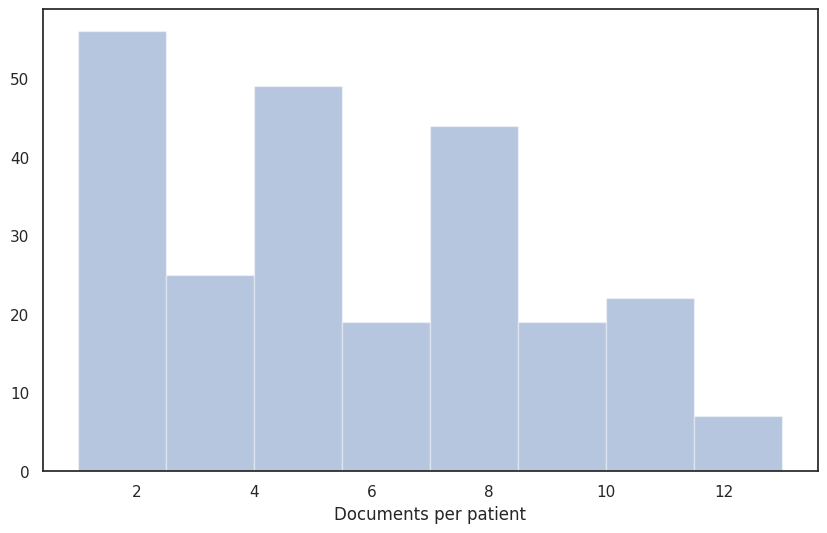

In [24]:
sns.distplot(noteevents['subject_id'].value_counts().values, kde=False, axlabel='Documents per patient')
plt.show()

### There are different sources for the documesnt, we'll also plot that...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


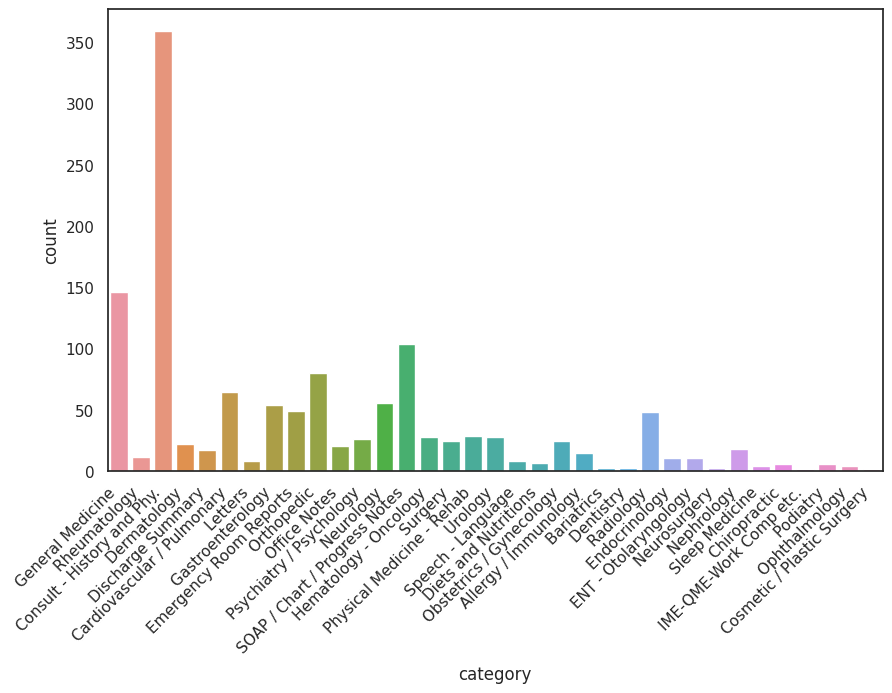

In [25]:
plot = sns.countplot(noteevents['category'])
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Age based statistics

In [26]:
# Convert to pandas dates
noteevents['chartdate'] = pd.to_datetime(noteevents['chartdate'])
patients['dob'] = pd.to_datetime(patients['dob'])

# Add a year column
noteevents['create_year'] = pd.DatetimeIndex(noteevents['chartdate']).year
patients['dob_year'] = pd.DatetimeIndex(patients['dob']).year

In [27]:
# Joint noteevents with patients
pt_notes = noteevents.merge(patients, on='subject_id', how='left')

In [28]:
pt_notes['age_year'] = pt_notes['create_year'] - pt_notes['dob_year']

In [29]:
# Remove patients older than 89 and younger than 16
pt_notes = pt_notes[pt_notes['age_year'] >= 16]
pt_notes = pt_notes[pt_notes['age_year'] <= 89]

In [30]:
# It is possible that the cleaning above created some patients with only one document
print("Number of patients with only one doc: " + str(sum(pt_notes['subject_id'].value_counts().values == 1)))

# Remove it there are any
remove_subject = set([k for k, v in pt_notes['subject_id'].value_counts().iteritems() if v == 1])
pt_notes = pt_notes[~pt_notes.subject_id.isin(remove_subject)]
print("After removal: " + str(sum(pt_notes['subject_id'].value_counts().values == 1)))

Number of patients with only one doc: 32
After removal: 0


In [31]:
pt_notes.category.value_counts()

 Consult - History and Phy.       322
 General Medicine                 114
 SOAP / Chart / Progress Notes     95
 Cardiovascular / Pulmonary        63
 Gastroenterology                  51
 Neurology                         48
 Orthopedic                        48
 Radiology                         34
 Emergency Room Reports            32
 Physical Medicine - Rehab         28
 Urology                           27
 Hematology - Oncology             24
 Obstetrics / Gynecology           23
 Psychiatry / Psychology           18
 Nephrology                        18
 Surgery                           17
 Discharge Summary                 17
 Office Notes                      16
 Dermatology                       13
 Allergy / Immunology              11
 Endocrinology                     11
 ENT - Otolaryngology              11
 Rheumatology                      10
 Speech - Language                  8
 Diets and Nutritions               7
 Letters                            7
 Chiropracti

In [32]:
# We'll do the following to make sure patients do not have documents that span 
# over multiple years, meaning their age would change.
dif_pt = {}
for ind, row in pt_notes.iterrows():
    sid = row['subject_id']
    if sid in dif_pt:
        dif_pt[sid].append(row['age_year'])
    else:
        dif_pt[sid] = [row['age_year']]

ehr_length = []
median_age = []
for v in dif_pt.values():
    mx = max(v)
    mi = min(v)
    median_age.append(np.median(v))
    ehr_length.append(mx - mi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


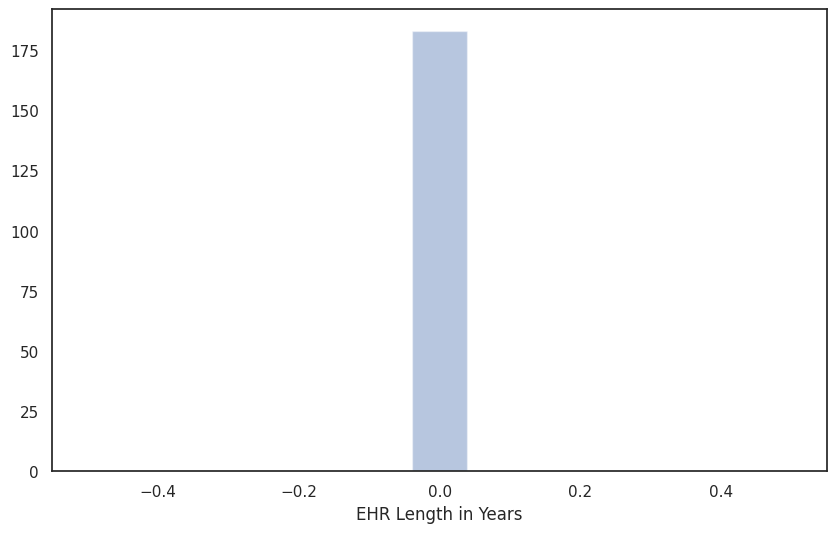

In [33]:
# We show this mainly to be sure that most patients have an EHR that spans less than 1 year 
sns.distplot(ehr_length, kde=False, axlabel='EHR Length in Years')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


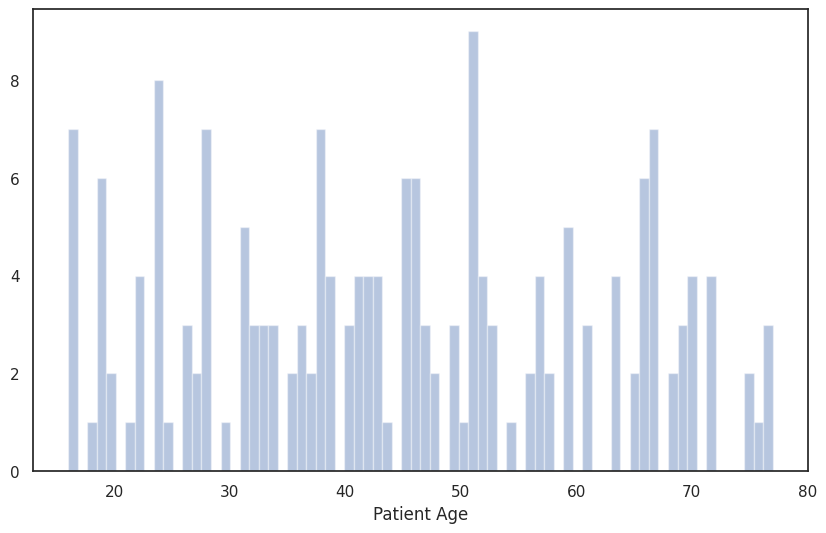

In [34]:
sns.distplot([np.round(x) for x in median_age], kde=False, bins=74, axlabel='Patient Age')
plt.show()

In [35]:
# Number of patients after/before cleaning
print(len(pt_notes['subject_id'].unique()))
print(len(noteevents_original['subject_id'].unique()))

183
288


In [36]:
# Document length after/before cleaning
print(np.average([len(str(x)) for x in pt_notes['text']]))
print(np.average([len(str(x)) for x in noteevents_original['text']]))

3261.0399636693915
3322.557276995305


In [37]:
# Number of documents after/before cleaning
print(len(pt_notes))
print(len(noteevents_original))

1101
2130


In [38]:
# Min number of documents per patient after/before cleaning
print(min(pt_notes['subject_id'].value_counts().values))
print(min(noteevents_original['subject_id'].value_counts().values))

2
1


In [39]:
# Max number of documents per patient after/before cleaning
print(max(pt_notes['subject_id'].value_counts().values))
print(max(noteevents_original['subject_id'].value_counts().values))

13
29


In [40]:
# Save the new DF
pt_notes.to_csv(DATA_DIR + "pt_notes.csv", index=False)

End of Dataset Analysis and Preparation tutorial